In [293]:
### Phase Div CODE FROM MARTIN

In [4]:
from phasediv import PhaseDiv3
from spimagine import volshow
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam
import sys
sys.path.append("/Users/dsaha/Python/alpao_calibration")
from calibration import Calibration
%matplotlib inline
import json
from scipy.spatial.distance import cdist
mirror = Calibration()
import datetime
import os
from random import random

In [5]:
p = PhaseDiv3(dshape = (128,128,128),   # shape of the output stack (Nz,Ny,Nx)
              units = (.1,)*3,          # pixelsize (dz,dy,dx) in micron
              lam = 0.5,                # wavelength in micron
              NA1=0.8,                 # Numerical Aperture of the detection obcejtive
                NA2 = 0,
              n = 1.33                  # refractive index of medium
              )

/Users/dsaha/python/phasediv/phasediv/phase_div3.py:84: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(1.*self.n**2-KR3**2*lam**2)


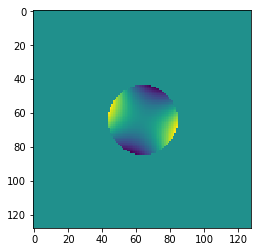

In [6]:
# define the wavefront as combination of some zernikes, e.g. astigmatism (z_5) and spherical (z_11)
wavefront = 0.47550055*p.zernike(5)+0.57551056*p.zernike(6)
plt.imshow(np.fft.fftshift(wavefront))

In [7]:
# the 3d psf
psf = np.fft.fftshift(p._psf_incoherent(wavefront))

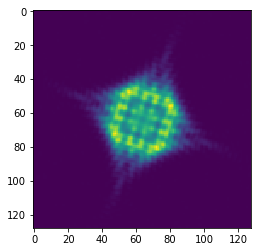

In [8]:
# the 2d psf
focal_psf = psf[p.Nz//2]
plt.imshow(focal_psf)

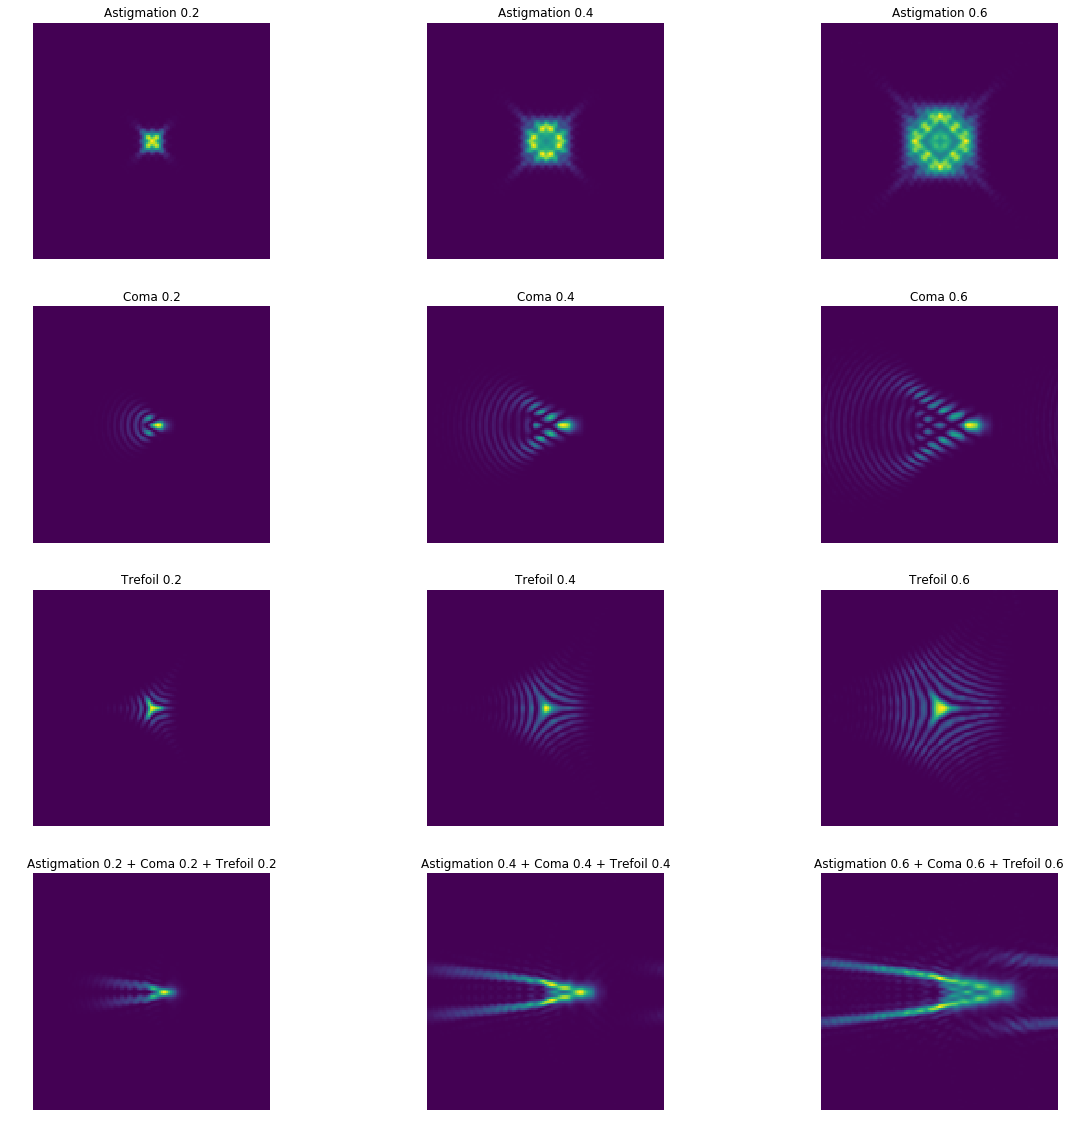

In [319]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
psf = np.fft.fftshift(p._psf_incoherent(0.2*p.zernike(5)))
plt.title("Astigmation 0.2")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,2)
psf = np.fft.fftshift(p._psf_incoherent(0.4*p.zernike(5)))
plt.title("Astigmation 0.4")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,3)
psf = np.fft.fftshift(p._psf_incoherent(0.6*p.zernike(5)))
plt.title("Astigmation 0.6")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,4)
psf = np.fft.fftshift(p._psf_incoherent(0.2*p.zernike(8)))
plt.title("Coma 0.2")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,5)
psf = np.fft.fftshift(p._psf_incoherent(0.4*p.zernike(8)))
plt.title("Coma 0.4")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,6)
psf = np.fft.fftshift(p._psf_incoherent(0.6*p.zernike(8)))
plt.title("Coma 0.6")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,7)
psf = np.fft.fftshift(p._psf_incoherent(0.2*p.zernike(10)))
plt.title("Trefoil 0.2")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,8)
psf = np.fft.fftshift(p._psf_incoherent(0.4*p.zernike(10)))
plt.title("Trefoil 0.4")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,9)
psf = np.fft.fftshift(p._psf_incoherent(0.6*p.zernike(10)))
plt.title("Trefoil 0.6")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,10)
psf = np.fft.fftshift(p._psf_incoherent(0.2*p.zernike(5) + 0.2*p.zernike(8) + 0.2*p.zernike(10)))
plt.title("Astigmation 0.2 + Coma 0.2 + Trefoil 0.2")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,11)
psf = np.fft.fftshift(p._psf_incoherent(0.4*p.zernike(5) + 0.4*p.zernike(8) + 0.4*p.zernike(10)))
plt.title("Astigmation 0.4 + Coma 0.4 + Trefoil 0.4")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");
plt.subplot(4,3,12)
psf = np.fft.fftshift(p._psf_incoherent(0.6*p.zernike(5) + 0.6*p.zernike(8) + 0.6*p.zernike(10)))
plt.title("Astigmation 0.6 + Coma 0.6 + Trefoil 0.6")
plt.imshow(psf[p.Nz//2])
plt.axis("OFF");

plt.savefig("/Users/dsaha/Desktop/Aberrations.png")

In [11]:
izs = 10*np.arange(-3,4)

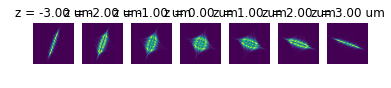

In [12]:
# Viewing 3d PSF
plt.ion()
plt.figure()
for i, iz in enumerate(izs):
    plt.subplot(1, len(izs),i+1)
    plt.imshow(psf[p.Nz//2+iz])
    plt.axis("off")
    plt.title("z = %.2f um"%(iz*p.dz))


In [22]:
type(psf)

numpy.ndarray

In [13]:
volshow(psf)